# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
from palmerpenguins import load_penguins
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, FunctionTransformer

In [3]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [4]:
X = penguins.drop('bill_depth_mm', axis = 1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25)

In [5]:
lr = LinearRegression()
enc = OneHotEncoder()
ct = ColumnTransformer([('dummify_s', enc, ['species']),
                       ('dummify_x', enc, ['sex']),
                        ('standardize_all', StandardScaler(), ['flipper_length_mm', "body_mass_g", "bill_length_mm"])],
                       remainder = 'drop'
                       )
OLS1 = Pipeline(
    [('dummify_everything', ct),('OLS', lr)]
)

In [6]:
OLS1fit = OLS1.fit(X_train, y_train)

In [7]:
OLS1Trpreds = OLS1fit.predict(X_train)
MSETrOLS = mean_squared_error(OLS1Trpreds, y_train)
MSETrOLS

0.5678480673399983

In [8]:
OLS1Tepreds = OLS1fit.predict(X_test)
MSETeOLS = mean_squared_error(OLS1Tepreds, y_test)
MSETeOLS

0.7766382419399442

In [9]:
lr = LinearRegression()
enc = OneHotEncoder()
ct = ColumnTransformer([('dummify_s', enc, ['species']),
                       ('dummify_x', enc, ['sex']),
                        ('standardize_all', StandardScaler(), ['flipper_length_mm', "body_mass_g", "bill_length_mm"])],
                       remainder = 'drop'
                       )
KNN5 = Pipeline(
    [('dummify_everything', ct),('KNN5', KNeighborsRegressor(5))]
)

In [10]:
KNN5fit = KNN5.fit(X_train, y_train)

In [11]:
KNN5Trpreds = KNN5fit.predict(X_train)
MSETrKNN5 = mean_squared_error(KNN5Trpreds, y_train)
MSETrKNN5

0.42700722891566223

In [12]:
KNN5Tepreds = KNN5fit.predict(X_test)
MSETeKNN5 = mean_squared_error(KNN5Tepreds, y_test)
MSETeKNN5

0.8736904761904769

In [13]:
lr = LinearRegression()
enc = OneHotEncoder()
ct = ColumnTransformer([('dummify_s', enc, ['species']),
                       ('dummify_x', enc, ['sex']),
                        ('standardize_all', StandardScaler(), ['flipper_length_mm', "body_mass_g", "bill_length_mm"])],
                       remainder = 'drop'
                       )
KNN15 = Pipeline(
    [('dummify_everything', ct),('KNN5', KNeighborsRegressor(15))]
)

In [14]:
KNN15fit = KNN15.fit(X_train, y_train)

In [15]:
KNN15Trpreds = KNN15fit.predict(X_train)
MSETrKNN15 = mean_squared_error(KNN15Trpreds, y_train)
MSETrKNN15

0.5465245872378401

In [16]:
KNN15Tepreds = KNN15fit.predict(X_test)
MSETeKNN15 = mean_squared_error(KNN15Tepreds, y_test)
MSETeKNN15

0.784224338624339

In [17]:
lr = LinearRegression()
enc = OneHotEncoder()
ct = ColumnTransformer([('dummify_s', enc, ['species']),
                       ('dummify_x', enc, ['sex']),
                        ('standardize_all', StandardScaler(), ['flipper_length_mm', "body_mass_g", "bill_length_mm"])],
                       remainder = 'drop'
                       )
DT = Pipeline(
    [('dummify_everything', ct),('DecisionTree', DecisionTreeRegressor(min_samples_leaf = 5))]
)

In [18]:
DTfit = DT.fit(X_train, y_train)

In [19]:
DTtrpred = DTfit.predict(X_train)
MSEDTtr = mean_squared_error(DTtrpred, y_train)
MSEDTtr

0.3411241792567094

In [20]:
DTtepred = DTfit.predict(X_test)
MSEDTte = mean_squared_error(DTtepred, y_test)
MSEDTte

1.0519756232828243

In [21]:
MSES = pd.DataFrame({"Model": ["OLS", "KNN(5)", "KNN(15)", "Decision Tree"],
                     "Train MSE": [MSETrOLS, MSETrKNN5, MSETrKNN15, MSEDTtr],
                     "Test MSE": [MSETeOLS, MSETeKNN5, MSETeKNN15, MSEDTte]
                     }
                    )
mse_melted = pd.melt(MSES, id_vars='Model', value_vars=['Train MSE', 'Test MSE'],
                    var_name='MSE Type', value_name='MSE')
mse_melted

,Model,MSE Type,MSE
0,OLS,Train MSE,0.567848
1,KNN(5),Train MSE,0.427007
2,KNN(15),Train MSE,0.546525
3,Decision Tree,Train MSE,0.341124
4,OLS,Test MSE,0.776638
5,KNN(5),Test MSE,0.873690
6,KNN(15),Test MSE,0.784224
7,Decision Tree,Test MSE,1.051976


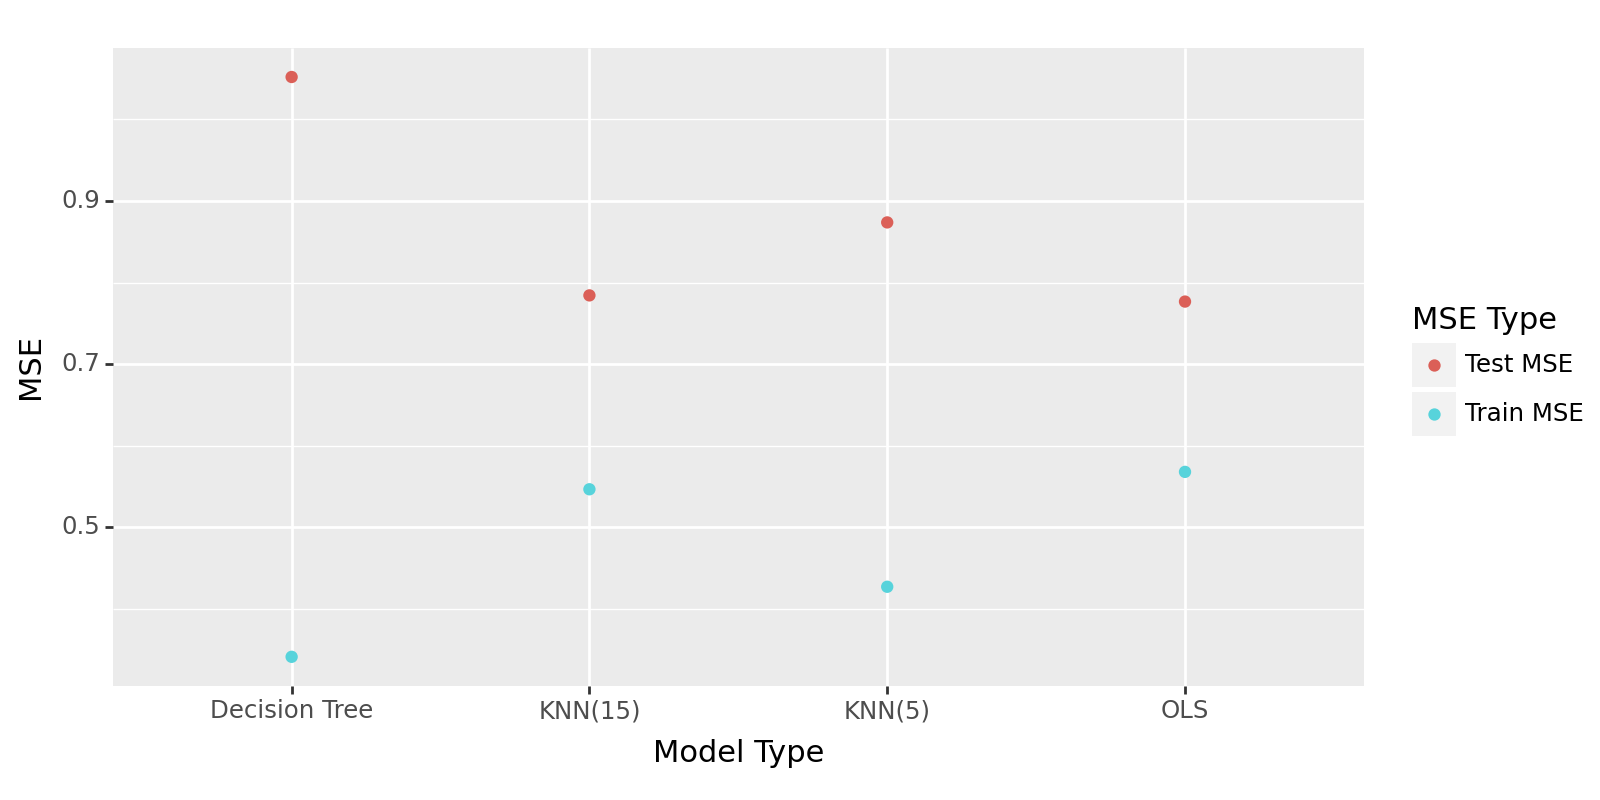

<Figure Size: (800 x 400)>

In [22]:
from plotnine import *
(
    ggplot(mse_melted)
    + aes(x='Model', y = 'MSE', color = 'MSE Type')
    + geom_point()
    + labs(x='Model Type', y = "MSE")
    + theme(figure_size=(8, 4))
)